In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import re

In [2]:
filename = '../data-sets/fake_job_postings.csv'

In [3]:
df = pd.read_csv(filename)

In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
# Checking the percentage of null items for each column

100 * df.isnull().sum() /len(df)

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [9]:
# Removing the rows of all the NaN entries in the 'Location' column

df.dropna(subset=['location'], axis=0, inplace=True)

In [10]:
df['department'].value_counts()

Sales                                         547
Engineering                                   486
Marketing                                     396
Operations                                    270
IT                                            221
Development                                   145
Product                                       112
Information Technology                         86
Technology                                     75
Design                                         75
Customer Service                               73
Finance                                        69
tech                                           55
HR                                             55
R&D                                            54
Creative                                       48
Retail                                         45
Client Services                                45
Product Development                            36
Business Development                           32


In [11]:
# Since 64% of department entries are missing we can't remove all the NaN rows. 
# Since there are over 1,000 different department types it's not something we can fill easily, 
# So we are going to drop this entire column

df.drop('department', axis=1, inplace=True)

In [12]:
df['salary_range'].value_counts()

0-0                141
40000-50000         66
30000-40000         55
25000-30000         37
45000-67000         37
30000-50000         32
80000-100000        30
35000-45000         30
70000-90000         30
50000-80000         29
55000-75000         28
60000-80000         28
50000-70000         27
30000-35000         27
40000-60000         27
40000-45000         27
25000-35000         26
50000-60000         23
45000-50000         22
40000-70000         21
35000-40000         20
100000-120000       20
80000-120000        19
35000-50000         18
18000-20000         18
80000-110000        17
20000-25000         17
30000-45000         17
60000-75000         17
20000-30000         16
                  ... 
24000-29000          1
120000-135000        1
93600-114400         1
3000-60000           1
32000-46000          1
55000-90000          1
100000-115000        1
65-75                1
156000-187200        1
0-60000              1
20000-38000          1
85000-125000         1
800000-2000

In [13]:
# Over 83% of Salary Ranges are missing. We can't remove every row, but this column proves not to be useful
# to us with so much data missing, so we will remove it.

df.drop('salary_range', axis=1, inplace=True)

In [14]:
# There's only one company with a missing description, so let's remove that one entry

df.dropna(subset=['description'], axis=0, inplace=True)

In [15]:
# There are 15% of job requirements missing. This feels like too large of a portion of the data to remove, so instead
# I think the best thing to do is to fill in all the NaN's with the following string 'No Requirements Listed'

df['requirements'].fillna(value='No Requirements Listed', inplace=True)

In [16]:
# There are 18% of company profile descriptions missing. This feels like too large of a portion of the data to remove, so instead
# I think the best thing to do is to fill in all the NaN's with the following string 'No Company Description Listed'

df['company_profile'].fillna(value='No Compaby Description Listed', inplace=True)

In [17]:
# There are 40% of job benefits missing. This is such a large portion of the data. However it is something that
# is a big part of job descriptions. I want to fill all NaN's with 'No Benefits Listed'

df['benefits'].fillna(value='No Benefits Listex', inplace=True)

In [18]:
# Checking to see what all the different values are for the column 'employment_type'

df['employment_type'].value_counts()

Full-time    11524
Contract      1512
Part-time      783
Temporary      239
Other          219
Name: employment_type, dtype: int64

In [19]:
# Creating a function to find if any of the employment types are listed in the job description.
# We can then use this to fill the employment type column

def employment_type_filler(column):
    if re.search('[Ff]\w\w\w-\w\w\w[eE]', column):
        return 'Full-time'
    elif re.search('[Cc]\w\w\w\w\w\w[tT]', column):
        return 'Contract'
    elif re.search('[Pp]\w\w\w-\w\w\w[eE]', column):
        return 'Part-time'
    elif re.search('[Tt]\w\w\w\w\w\w\w[yY]', column):
        return 'Temporary'

In [20]:
# Filling the empty values in the employment_type column based on if it's listed in the job description 

df['employment_type'].fillna(value=df['description'].apply(employment_type_filler), inplace=True)

In [21]:
# Checking to see if the value counts were updated

df.employment_type.value_counts()

Full-time    11737
Contract      2962
Part-time      811
Temporary      410
Other          219
Name: employment_type, dtype: int64

In [22]:
# Checking to see how many null values we have left in the employment_type column, and what percentage is missing
# in relation to all the entries in the dataframe

print(df.isnull()['employment_type'].sum())
float( 100 * df.isnull()['employment_type'].sum() / len(df))

1394


7.0

In [23]:
# Since it's only 7% I can either remove it, or add the remaining as another value. I decided to fill 
# the remaining NaN values as 'Other'

df['employment_type'].fillna('Other', inplace=True)

In [24]:
# Checking the value counts of required experience

df['required_experience'].value_counts()

Mid-Senior level    3776
Entry level         2685
Associate           2282
Not Applicable      1100
Director             386
Internship           368
Executive            140
Name: required_experience, dtype: int64

In [25]:
# Let's create a function that will go through the 'description', and the 'requirements' columns to try and fill
# the missing values for the 'required_experience' column

def required_experience_filler(column):
        if re.search('[Mm]\w\w-\w\w\w\w\w\w\s\w\w\w\w[lL]', column):
            return 'Mid-Senior level'
        elif re.search('[Ee]\w\w\w\w\s\w\w\w\w[lL]', column):
            return 'Entry level'
        elif re.search('[Aa]\w\w\w\w\w\w\w[eE]', column):
            return 'Associate'
        elif re.search('[Nn]\w\w\s\w\w\w\w\w\w\w\w\w[eE]', column):
            return 'Not Applicable'
        elif re.search('[Dd]\w\w\w\w\w\w[rR]', column):
            return 'Director'
        elif re.search('[Ii]\w\w\w\w\w\w\w\w[pP]', column):
            return 'Internship'
        elif re.search('[Ee]\w\w\w\w\w\w\w[eE]', column):
            return 'Executive'

In [26]:
# Filling all the null values in the 'required_experience' column with our new function above

df['required_experience'].fillna(value=df['requirements'].apply(required_experience_filler), inplace=True)

In [27]:
# Checking new value counts for 'required_experience'

df['required_experience'].value_counts()

Mid-Senior level    3780
Associate           3500
Entry level         3496
Not Applicable      1306
Executive            876
Director             765
Internship           394
Name: required_experience, dtype: int64

In [28]:
# Checking to see what percent of 'required_experience' is still null

100 * df['required_experience'].isnull().sum() / len(df)

19

In [29]:
# Now I will fill the remaining null values by going through the description column.

df['required_experience'].fillna(value=df['description'].apply(required_experience_filler), inplace=True)

In [30]:
100 * df['required_experience'].isnull().sum() / len(df)

3

In [31]:
# I decided to fill the remaining null values with 'Other' for 'required_experience'

df['required_experience'].fillna('Other', inplace=True)

In [32]:
df['required_experience'].value_counts()

Associate           4590
Entry level         3993
Mid-Senior level    3780
Executive           1866
Not Applicable      1343
Director             911
Other                608
Internship           442
Name: required_experience, dtype: int64

In [33]:
# Checking the value counts for 'required_education'

df['required_education'].value_counts()

Bachelor's Degree                    5112
High School or equivalent            2067
Unspecified                          1392
Master's Degree                       410
Associate Degree                      272
Certification                         169
Some College Coursework Completed     101
Professional                           74
Vocational                             48
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [34]:
# Creating a function similar to the required_experience_filler function to fill null values for 
# required education

def required_education_filler(column):
        if re.search('[Bb]\w\w\w\w\w\w\w\'\w\s\w\w\w\w\w[eE]', column):
            return 'Bachelor\'s Degree'
        elif re.search('[Hh]\w\w\w\s\w\w\w\w\w\w\s\w\w\s\w\w\w\w\w\w\w\w\w[tT]', column):
            return 'High School or equivalent'
        elif re.search('[Uu]\w\w\w\w\w\w\w\w\w[dD]', column):
            return 'Unspecified'
        elif re.search('[Mm]\w\w\w\w\w\'\s\w\w\w\w\w[eE]', column):
            return 'Master\'s Degree'
        elif re.search('[Aa]\w\w\w\w\w\w\w\w\s\w\w\w\w\w[eE]', column):
            return 'Associate Degree'
        elif re.search('[Cc]\w\w\w\w\w\w\w\w\w\w\w[nN]', column):
            return 'Certification'
        elif re.search('[Ss]\w\w\w\s\w\w\w\w\w\w\w\s\w\w\w\w\w\w\w\w\w\w\s\w\w\w\w\w\w\w\w[dD]', column):
            return 'Some College Coursework Completed'
        elif re.search('[Pp]\w\w\w\w\w\w\w\w\w\w[lL]', column):
            return 'Professional'
        elif re.search('[Vv]\w\w\w\w\w\w\w\w[lL]', column):
            return 'Vocational'
        elif re.search('[Ss]\w\w\w\s\w\w\w\w\s\w\w\w\w\w\w\s\w\w\w\w\w\w\w\w\w[kK]', column):
            return 'Some High School Coursework '
        elif re.search('[Dd]\w\w\w\w\w\w\w[eE]', column):
            return 'Doctorate'
        elif re.search('[Vv]\w\w\w\w\w\w\w\w\w\s-\s\w\w\s\w\w\w\w\w\w[aA]', column):
            return 'Vocational - HS Diploma'
        elif re.search('[Vv]\w\w\w\w\w\w\w\w\w\s-\s\w\w\w\w\w[eE]', column):
            return 'Vocational - Degree'

In [35]:
# Filling the null values in 'required_education' based on what's in the 'requirements' column

df['required_education'].fillna(value=df['requirements'].apply(required_education_filler), inplace=True)

In [36]:
df['required_education'].value_counts()

Bachelor's Degree                    5242
Certification                        2403
High School or equivalent            2072
Unspecified                          1551
Doctorate                             722
Associate Degree                      500
Professional                          439
Master's Degree                       410
Some College Coursework Completed     101
Vocational                             92
Some High School Coursework            27
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [37]:
# Checking to see the percentage of 'required_education' still null

100 * df['required_education'].isnull().sum() / len(df)

22

In [38]:
# Filling the null values in 'required_education' based on what's in the 'description' column

df['required_education'].fillna(value=df['description'].apply(required_education_filler), inplace=True)

In [39]:
# Checking to see the percentage of 'required_education' still null

100 * df['required_education'].isnull().sum() / len(df)

10

In [40]:
# Filling the remaining null values with 'Other'

df['required_education'].fillna('Other', inplace=True)

In [41]:
# Checking the value counts in industry

df['industry'].value_counts()

Information Technology and Services    1718
Computer Software                      1364
Internet                               1048
Education Management                    822
Marketing and Advertising               821
Financial Services                      774
Hospital & Health Care                  495
Consumer Services                       357
Telecommunications                      340
Oil & Energy                            285
Retail                                  222
Real Estate                             174
Accounting                              159
Construction                            157
E-Learning                              139
Management Consulting                   130
Staffing and Recruiting                 127
Health, Wellness and Fitness            125
Design                                  124
Insurance                               123
Automotive                              118
Logistics and Supply Chain              112
Human Resources                 

In [42]:
# Since there are over 130 different industries, it makes it difficult to feature engineer the null values
# Additionally since the null values account for 27% of all entries in the dataframe it's too much to remove all these
# null values. As an alternative I am going to fill all the null values with the string 'Not Specified'

df['industry'].fillna('Not Specified', inplace=True)

In [43]:
# Checking the value counts for the 'function' column

df['function'].value_counts()

Information Technology    1735
Sales                     1458
Engineering               1335
Customer Service          1227
Marketing                  821
Administrative             620
Health Care Provider       337
Design                     336
Education                  325
Other                      323
Management                 317
Business Development       226
Accounting/Auditing        212
Human Resources            204
Project Management         183
Finance                    171
Consulting                 143
Art/Creative               131
Writing/Editing            129
Production                 115
Product Management         114
Quality Assurance          110
Advertising                 88
Business Analyst            82
Data Analyst                81
Public Relations            76
Manufacturing               74
General Business            65
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [44]:
# Since I think null values can help our model predict which job postings are fradulent, I am going to fill 
# the null values for 'function' with 'Not Specified'

df['function'].fillna('Specified', inplace=True)

In [45]:
# Checking to see if there are any null values left

df.isnull().sum()

job_id                 0
title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Exploratory Data Analysis

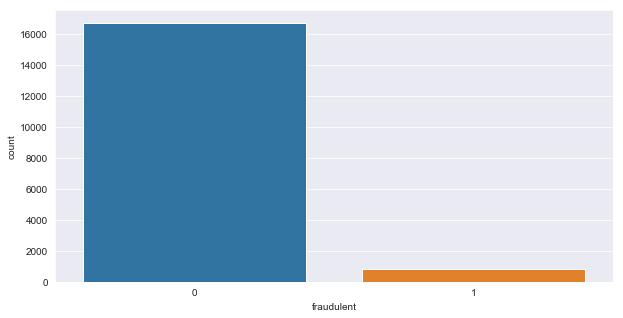

In [46]:
# Checking to see how many fradulent vs. real job postings there are in our data set

plt.figure(figsize=(10, 5))
sns.countplot(df['fraudulent'])

In [47]:
print("Total Non-Fraudulent Job Postings {}".format(len(df[df['fraudulent'] == 0])))
print("Total Fraudulent Job Postings {}".format(len(df[df['fraudulent'] == 1])))

Total Non-Fraudulent Job Postings 16687
Total Fraudulent Job Postings 846


In [48]:
print("Percentage of Non-Fraudulent Job Postings {}".format(100 * float(len(df[df['fraudulent'] == 0])) / len(df)))
print("Percentage of Fraudulent Job Postings {}".format(100 * float(len(df[df['fraudulent'] == 1])) / len(df)))

Percentage of Non-Fraudulent Job Postings 95.1748132094
Percentage of Fraudulent Job Postings 4.82518679062


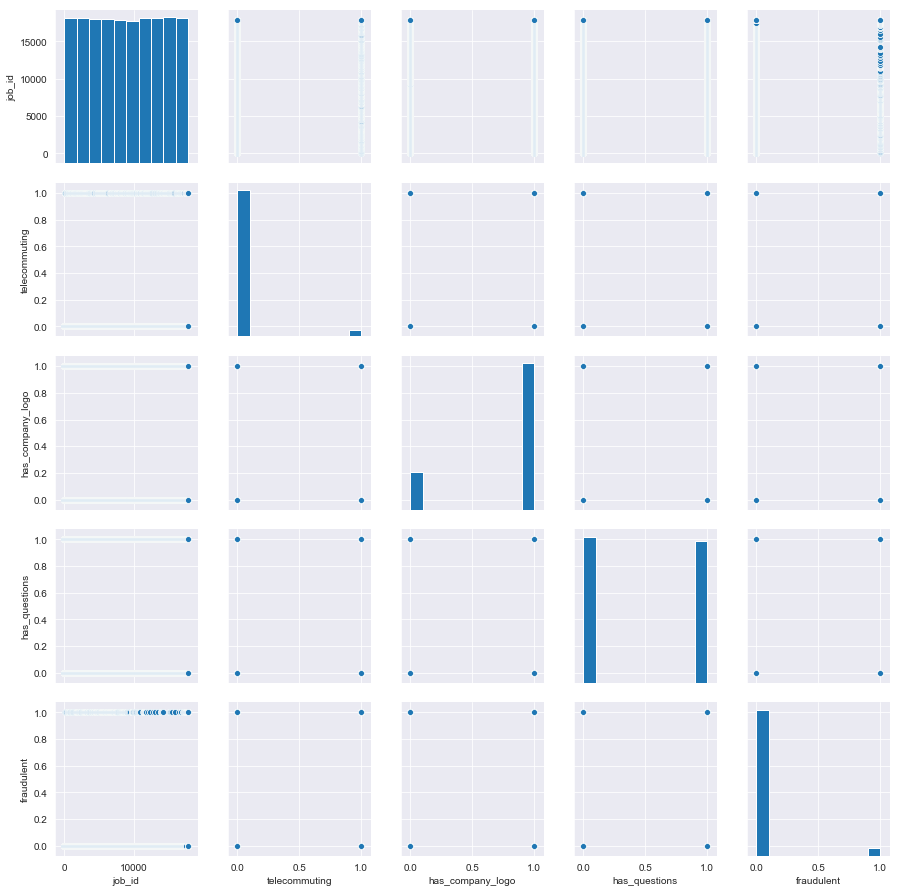

In [49]:
# Getting a general visual overview of all numerical relationships in our data

sns.pairplot(df)

In [50]:
# Importing a count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [51]:
description_vectorizer = CountVectorizer(lowercase=True, stop_words='english')
description_counts = description_vectorizer.fit_transform(df['description'])

In [52]:
feature_names = description_vectorizer.get_feature_names()

description_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

In [53]:
count_list = description_counts.toarray().sum(axis=0)
count_list

array([459, 879,  22, ...,   1,   1,   2])

In [54]:
feature_names = np.asarray(feature_names)

In [55]:
dv_df = pd.DataFrame([feature_names, count_list])
dv_df = dv_df.transpose()

In [56]:
dv_df.rename(columns={0: 'Word',
                     1: 'Count'}, inplace=True)

dv_df.head(10)

,Word,Count
0,00,459
1,000,879
2,0001pt,22
3,0005,1
4,000a,1
5,000bonus,2
6,000full,1
7,000if,1
8,000k,1
9,000location,1


In [57]:
# Sorting the words from highest count to lowest count

dv_df.sort_values(['Count'], ascending=False, inplace=True)

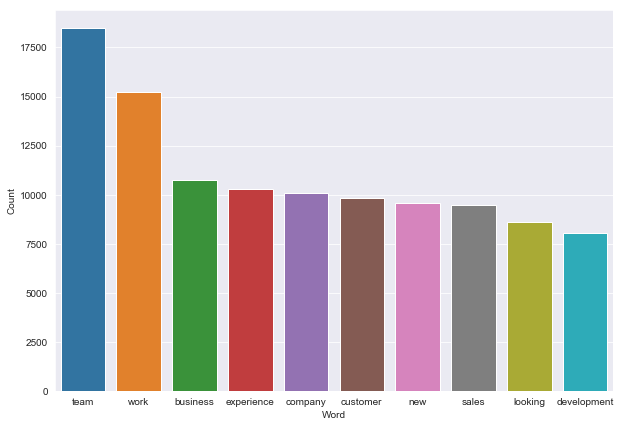

In [58]:
# Plotting the word counts for the top 10 most frequent words
plt.figure(figsize=(10, 7))
top_ten_dw = dv_df[:10]

sns.barplot(x='Word', y='Count', data=top_ten_dw)

In [59]:
# Let's visualize the distribution of the top 50 words in 'description', with Plotly

import plotly
import cufflinks as cf
cf.go_offline()

dv_df[:50].iplot(kind='bar', x='Word', y='Count')


We can see a sharp decline from the most common word to the 50th most common word from looking at the distribution above.

In [60]:
# I would also like to Count Vectorize the 'requirements' column. I will do so below.

requirements_vectorizer = CountVectorizer(lowercase=True, stop_words='english')

requirements_counts = requirements_vectorizer.fit_transform(df['requirements'])

In [61]:
# Creating an array of all the Words in the 'requirement' column

requirement_feature_names = requirements_vectorizer.get_feature_names()
requirement_feature_names = np.asarray(requirement_feature_names)

In [62]:
# Creating an array of all the counts for each word based on its index in the 'requirements' column

requirement_counts = requirements_counts.toarray().sum(axis=0)

In [63]:
# Creating a DataFrame for words and their total counts in the 'requirement' column

rv_df = pd.DataFrame([requirement_feature_names, requirement_counts])
rv_df = rv_df.transpose()

rv_df.rename(columns={0: 'Word',
                    1: 'Count'}, inplace=True)

rv_df.sort_values('Count', ascending=False, inplace=True)

In [64]:
rv_df.head(10)

,Word,Count
15598,experience,24354
38721,skills,12537
47122,work,10020
794,ability,8677
47654,years,7931
22730,knowledge,6905
35294,required,5805
7807,communication,5462
24511,management,5136
35540,requirements,5124


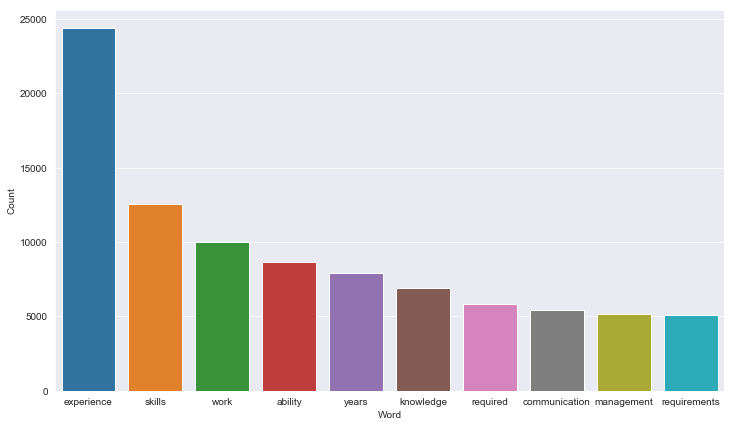

In [65]:
# Plotting the top ten most frequent words in the 'requirements' column

plt.figure(figsize=(12, 7))
sns.barplot(x='Word', y='Count', data=rv_df[:10])

In [66]:
# Plotting the top fifty most frequent words in the 'requirements' column using plotly

rv_df[:50].iplot(kind='bar', x='Word', y='Count', color='blue')

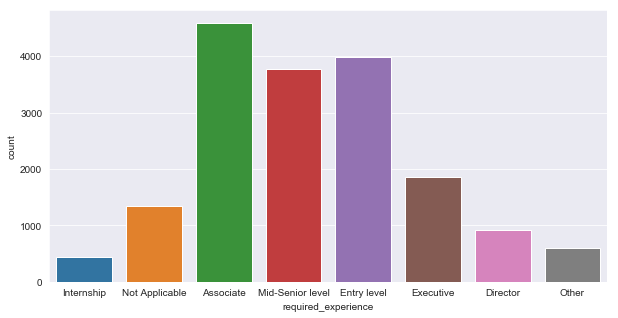

In [67]:
# Plotting the countplot / distribution of 'required_experience'

plt.figure(figsize=(10, 5))
sns.countplot(df['required_experience'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

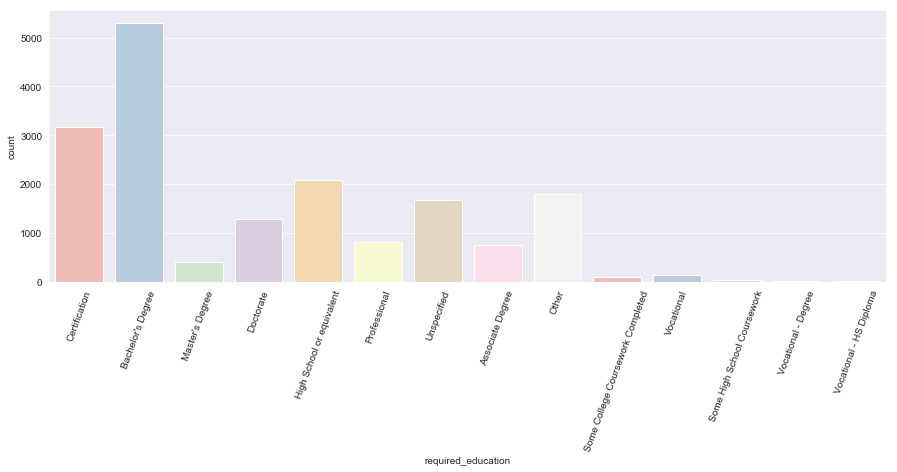

In [68]:
# Plotting the countplot / distribution of 'required_education'

plt.figure(figsize=(15, 5))
sns.countplot(df['required_education'], palette='Pastel1')
plt.xticks(rotation=70)

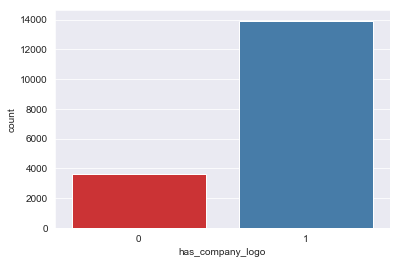

In [69]:
# Looking at the counts for the 'has_company_logo' column

sns.countplot(x='has_company_logo', data=df, palette='Set1')

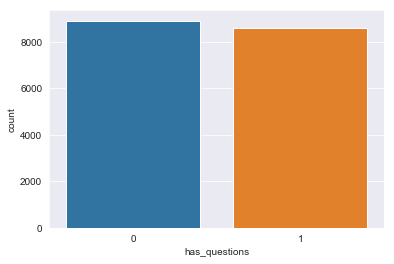

In [70]:
# Looking at the counts for 'has_questions'

sns.countplot(x='has_questions', data=df)

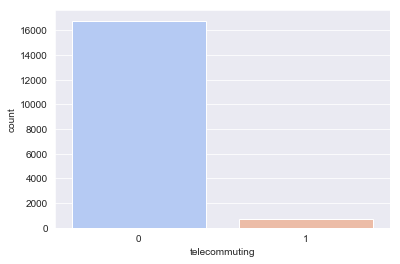

In [71]:
# Looking at the counts for 'telecommuting'

sns.countplot(x='telecommuting', data=df, palette='coolwarm')

## Creating a Model to predict real and fake job postings

In [72]:
# Importing Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

In [73]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [74]:
df.head(1)

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,No Benefits Listex,0,1,0,Other,Internship,Certification,Not Specified,Marketing,0


In [75]:
# I am curious to test two different features that I think would contribute the most individually, and then
# compare that with a model built off of multiple features and compare. I will start with 'description' individually

X = df['description']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [76]:
# Creating a variable for our CountVectorizer, then fit transforming our X_train set.
# Lastly creating a variable for our MultiNomialNB object named model

vectorizer = CountVectorizer(lowercase=True, stop_words='english')

X_train_vectorized = vectorizer.fit_transform(X_train)

model = MultinomialNB()

In [77]:
# Fitting our model with our vectorized X_train, and y_train data

model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [78]:
# Transforming our X_test with our vectorizer object, then predicting whether a job description is fraudulent or
# not based off of our model and vectorized X_test input

X_test_vectorized = vectorizer.transform(X_test)

predictions = model.predict(X_test_vectorized)

In [79]:
# Importing classification_report, and confusion_matrix to measure the recall and f1-score results of our model.

from sklearn.metrics import classification_report, confusion_matrix

In [80]:
# Printing our confusion matrix and classification report

print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3344
           1       0.71      0.47      0.56       163

   micro avg       0.97      0.97      0.97      3507
   macro avg       0.84      0.73      0.77      3507
weighted avg       0.96      0.97      0.96      3507



[[3313   31]
 [  87   76]]


In [81]:
# Checking to see how much this model explains the variability of our 'fraudulent' label

r2_1 = model.score(X_test_vectorized, y_test)
r2_1

0.9663530082691759

In [82]:
n = len(X_train)
r2_adj = 1 - (1-r2_1)*(n-1)/(n-1-1)
print(r2_adj)

0.9663506090256127


The results from this model are great at prediction 0, or 'not_fraudulent' job postings, but has a tougher time
predicting 1's, or 'fraudulent' job postings.

Our recall for predicting fraudulent job postings is 0.47 - this means that for all the actual fraudulent
job postings our model correctly predicted less than 50% of these job postings as fraudulent. This is not a great
recall score.

Our f-1 score is higher at 0.56, but this is only because our accuracy score was 0.71. The reason our accuracy is
so high is most likely due to the fact there is huge unbalance between non-fraudulent, and fraudulent job postings in
this data set. 

The positive from this model is that the description column alone seems to account for 96% of the variability in the fraudulent column.

In [83]:
# Creating a new model only using the requirements column as our feature

X = df['requirements']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [84]:
# Creating our X_train vectors, and X_test vectors

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [85]:
# Fitting our new model

model.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [86]:
# Predicting based off our new model

predictions_2 = model.predict(X_test_vect)

In [87]:
# Printing the classification report and confusion matrix based off of our new model

print(classification_report(y_test, predictions_2))
print("\n")
print(confusion_matrix(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3344
           1       0.70      0.20      0.31       163

   micro avg       0.96      0.96      0.96      3507
   macro avg       0.83      0.60      0.65      3507
weighted avg       0.95      0.96      0.95      3507



[[3330   14]
 [ 130   33]]


In [88]:
# Checking the explained variability of the new model for our fraudulent label

r2_2 = model.score(X_test_vect, y_test)
r2_2

0.9589392643284859

In [89]:
n = len(X_train)
r2_adj = 1 - (1-r2_2)*(n-1)/(n-1-1)
print(r2_adj)

0.9589363364380358


This model did a better job of predicting real aka non-fraudulent job postings, but it much worse job predicting fraudulent jobs. Our recall score for predicting fraudulent job postings is down 27% to 0.2, and our f1-score is down to 0.31

This model doesn't do a good enough job of predicting fraudulent job postings, as it considers too many fraudulent job postings as real job postings which is what we want to avoid.

In [90]:
# Creating our feature and label variable for multiple input features - this time I'm going to use 'description',
# 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry' and 'function'

X = df['description'] + df['requirements'] + df['benefits'] + df['employment_type'] + df['required_experience'] +\
df['required_education'] + df['industry'] + df['function']

y = df['fraudulent']

In [91]:
# Creating our train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [92]:
# Vectorizing our training and test input features

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [93]:
# Fitting the model

model.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [94]:
# Predicting frauduelnt vs. no fraudulent based off the model with the test features

predictions_3 = model.predict(X_test_vect)

In [95]:
# Printing the new classification report and confusion matrix

print(classification_report(y_test, predictions_3))
print("\n")
print(confusion_matrix(y_test, predictions_3))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3344
           1       0.80      0.43      0.56       163

   micro avg       0.97      0.97      0.97      3507
   macro avg       0.89      0.71      0.77      3507
weighted avg       0.96      0.97      0.96      3507



[[3327   17]
 [  93   70]]


In [96]:
# Checking the explained variability of the new model for our fraudulent label

r2_3 = model.score(X_test_vect, y_test)
r2_3

0.9686341602509267

In [97]:
# Checking the adjusted R-squared score to see if the additional variables helped our hurt our model

n = len(X_train)
r2_adj = 1 - ((1-r2_3)*(n-1)/(n-8-1))
print(r2_adj)

0.9686162586515836


It looks like this model compares similarly to ourfirst model built off of only the 'description' feature. We have the same f-1 score for 0, and 1 as we do with our first model.

When looking at the confusion matrix it looks like this model did a slightly better job at predicting real job postings and did a slightly worse job at predicting fraudulent emails.

The explained variability is only slightly increased by 0.002, and the adjusted R-squared is slightly increased, but this small increase only shows that the additional variables don't add much predictive power to this model.

Before choosing a new model, I want to build a model using the Tfidf vectorizer instead of the CountVectorizer to see if a new model would do a better job at predicting fraudulent job postings.

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')

In [100]:
# Building our features for this new model

X = df['description'] + df['requirements'] + df['benefits'] + df['employment_type'] + df['required_experience'] +\
df['required_education'] + df['industry'] + df['function']

y = df['fraudulent']

In [101]:
# Creating our train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [102]:
# Vectorizing our training and test input features with the TfidfVectorizer

X_train_vect = tfidf.fit_transform(X_train)

X_test_vect = tfidf.transform(X_test)

In [103]:
# Fitting the model

model.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [104]:
predictions_4 = model.predict(X_test_vect)

In [105]:
# Printing the new classification report and confusion matrix

print(classification_report(y_test, predictions_4))
print("\n")
print(confusion_matrix(y_test, predictions_4))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3344
           1       0.00      0.00      0.00       163

   micro avg       0.95      0.95      0.95      3507
   macro avg       0.48      0.50      0.49      3507
weighted avg       0.91      0.95      0.93      3507



[[3342    2]
 [ 163    0]]


In [106]:
# Checking the explained variability of the new model for our fraudulent label

r2_4 = model.score(X_test_vect, y_test)
r2_4

0.9529512403763901

In [107]:
# Creating our variables just using the description feature

X = df['requirements']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [108]:
# Vectorizing our training and test input features with the TfidfVectorizer

X_train_vect = tfidf.fit_transform(X_train)

X_test_vect = tfidf.transform(X_test)

In [109]:
# Fitting the model

model.fit(X_train_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [110]:
predictions_5 = model.predict(X_test_vect)

In [111]:
# Printing the new classification report and confusion matrix

print(classification_report(y_test, predictions_5))
print("\n")
print(confusion_matrix(y_test, predictions_5))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3344
           1       0.00      0.00      0.00       163

   micro avg       0.95      0.95      0.95      3507
   macro avg       0.48      0.50      0.49      3507
weighted avg       0.91      0.95      0.93      3507



[[3344    0]
 [ 163    0]]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [112]:
r2_5 = model.score(X_test_vect, y_test)
r2_5

0.9535215283718278

The Tfidf Vectorizer doesn't do it's intended job at all of predicting fraudulent emails. I tested it uisng a multiple features variable, and then again on just on one feature variable.

For the multiple features the model predicted all but two instances as non-fraudulent, and the single feature model predicted that all the instances were non-fraudulent. These models completely missed the point and are insufficient and un-suable.

## Conclusion

In conclusion based off of all the models we built I think the third model we built using multiple features, and the CountVectorizer is the model I would put into production. 

It does a better job at predicting non-fraudulent emails, and the additional features don't harm the model. From a human perspective the additional features are beneficial to helping a human distinguish a real job posting from a fake job posting. 

In order to increase the model's ability to accurately predict the status of a job posting it would be necessary to gather more data for fraudulent job postings.